## Entrenar el modelo

Instalación de librerías

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import itertools


Carga de datos


In [97]:
data = pd.read_csv('rugby_data_with_elo.csv')

Preprocesamiento de datos

In [98]:
# Filter los datos desde el 2004 para trabajar con Elos más reales
data = data[data['Date'] >= '2004-01-01']

# Borramos todas las filas de partidos de los British and Irish Lions
data = data[(data['Home Team'] != 'LIO') & (data['Away Team'] != 'LIO')]

# Una fila tiene un valor nulo para 'Neutral' asi que los seteamos en 0
data['Neutral'].fillna(0, inplace=True)

# Seleccionamos los datos que nos interesan para el modelo
df = data[['Home Score', 'Away Score', 'Home Rank', 'Away Rank', 'Home Elo', 'Away Elo', 'Neutral']]

# Separamos en X e y
X = df[['Home Rank', 'Away Rank', 'Home Elo', 'Away Elo', 'Neutral']]
y = df[['Home Score', 'Away Score']]



In [99]:
data.info()
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 94 to 1266
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1160 non-null   object 
 1   Tournament   1108 non-null   object 
 2   Round        698 non-null    object 
 3   Home Team    1160 non-null   object 
 4   Away Team    1160 non-null   object 
 5   Home Score   1160 non-null   int64  
 6   Away Score   1160 non-null   int64  
 7   Home Tries   1160 non-null   int64  
 8   Away Tries   1160 non-null   int64  
 9   Home Points  1160 non-null   int64  
 10  Away Points  1160 non-null   int64  
 11  Venue        1160 non-null   object 
 12  Neutral      1160 non-null   float64
 13  Home Rank    1160 non-null   int64  
 14  Away Rank    1160 non-null   int64  
 15  Home Elo     1160 non-null   int64  
 16  Away Elo     1160 non-null   int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 163.1+ KB
<class 'pandas.core.frame.Dat

Separamos los datos en test y train

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escalamos los datos

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Experimentamos con capas y número de neuronas

In [116]:
# Definir las combinaciones de capas y neuronas a probar
combinations = list(itertools.product([1, 2, 3], [10, 15, 20]))

for layers, neurons in combinations:
    model = Sequential()
    model.add(Dense(neurons, input_dim=5, kernel_initializer='normal', activation='relu'))

    for _ in range(layers - 1):
        model.add(Dense(neurons, kernel_initializer='normal', activation='relu'))

    model.add(Dense(2, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    history = model.fit(X_train_scaled, y_train, validation_split=0.25, epochs=200, batch_size=25, verbose=0, validation_data=(X_test_scaled, y_test))

    mse = model.evaluate(X_test_scaled, y_test)
    print(f"Layers: {layers}, Neurons: {neurons}, MSE: {mse}")

8/8 [==============================] - 0s 2ms/step - loss: 101.2586
Layers: 1, Neurons: 10, MSE: 101.25862884521484
8/8 [==============================] - 0s 2ms/step - loss: 101.8765
Layers: 1, Neurons: 15, MSE: 101.87654113769531
8/8 [==============================] - 0s 2ms/step - loss: 101.0284
Layers: 1, Neurons: 20, MSE: 101.02839660644531
8/8 [==============================] - 0s 1ms/step - loss: 102.1412
Layers: 2, Neurons: 10, MSE: 102.14124298095703
8/8 [==============================] - 0s 1ms/step - loss: 101.3312
Layers: 2, Neurons: 15, MSE: 101.33120727539062
8/8 [==============================] - 0s 1ms/step - loss: 100.0562
Layers: 2, Neurons: 20, MSE: 100.05618286132812
8/8 [==============================] - 0s 2ms/step - loss: 102.5937
Layers: 3, Neurons: 10, MSE: 102.59366607666016
8/8 [==============================] - 0s 2ms/step - loss: 100.5432
Layers: 3, Neurons: 15, MSE: 100.54320526123047
8/8 [==============================] - 0s 2ms/step - loss: 99.8390
Layer

Creamos el modelo Secuencial

In [146]:
model = Sequential()
model.add(Dense(20, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal'))

Lo compilamos

In [147]:
model.compile(loss='mean_squared_error', optimizer='adam')

Y lo entrenamos

In [127]:
test_size = 0.2
batch_size = 25
epochs = 200
verbose = 0

In [148]:
history = model.fit(X_train_scaled, y_train, validation_split=0.25, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test_scaled, y_test))

Evaluamos con los datos de test

In [149]:
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error: {mse}")

8/8 [==============================] - 0s 1ms/step - loss: 99.5659
Mean Squared Error: 99.5658950805664


Graficamos

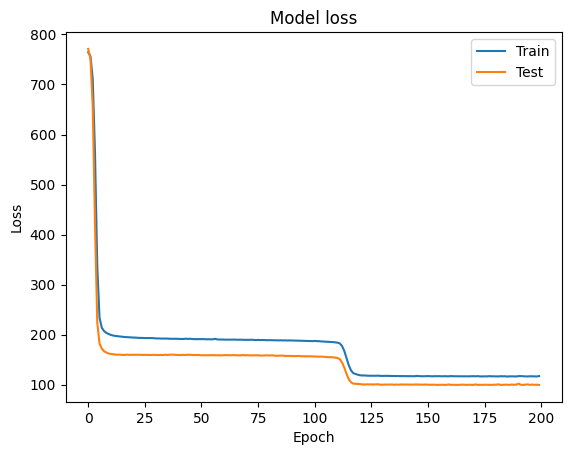

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


Desglose de los resultados

In [153]:
# Predicciones del test
y_pred = model.predict(X_test_scaled)

# Creamos un df para observar de mejor manera los valores de las predicciones comparados con los esperados
results = pd.DataFrame({'Expected Home Score': y_test['Home Score'], 'Expected Away Score': y_test['Away Score'],
                        'Predicted Home Score': y_pred[:, 0], 'Predicted Away Score': y_pred[:, 1]})

# Para visualizar a los ganadores agregamos una columna
results['Predicted Winner'] = results.apply(lambda row: 'Home' if row['Predicted Home Score'] > row['Predicted Away Score'] else 'Away', axis=1)

# Y tambien agramos la columna del ganador esperado
results['Expected Winner'] = results.apply(lambda row: 'Home' if row['Expected Home Score'] > row['Expected Away Score'] else 'Away', axis=1)

# Calculamos porcentajes de aciertos
correct_guesses = results[results['Predicted Winner'] == results['Expected Winner']]
accuracy = len(correct_guesses) / len(results) * 100

print(results)
print(f"Accuracy of Winning Team Prediction: {accuracy}%")

8/8 [==============================] - 0s 1ms/step
      Expected Home Score  Expected Away Score  Predicted Home Score  \
811                    39                   13             31.000528   
1258                   28                   17             18.318924   
586                    23                   32             38.093903   
143                    27                   14             21.905903   
1016                   22                   16             24.702351   
...                   ...                  ...                   ...   
1169                   16                   26             13.496529   
1231                   29                   17             38.815868   
861                    16                   21             19.254454   
918                    43                   10             46.873669   
1019                   36                   15             53.084991   

      Predicted Away Score Predicted Winner Expected Winner  
811              12.93

Ranking actual segun ELOs

In [154]:
df_rank = data
# Ordenamos el df por fecha
df_rank = df_rank.sort_values(by='Date', ascending=False)

# Agrupamos por equipo
elo_df = df_rank.groupby('Home Team').first().reset_index()

# Selecciones el último puntaje ELO
elo_df = elo_df[['Home Team', 'Home Elo']].rename(columns={'Home Team': 'Team', 'Home Elo': 'Elo'})

# Ordenamos el df
elo_df = elo_df.sort_values(by='Elo', ascending=False)

print(elo_df)

   Team   Elo
16  SAF  1990
4   ENG  1970
12  NZL  1970
8   IRE  1960
22  WAL  1940
6   FRA  1940
1   AUS  1940
10  JAP  1920
18  SCO  1920
0   ARG  1900
7   GEO  1890
5   FIJ  1880
19  TON  1870
9   ITA  1860
14  ROM  1850
17  SAM  1850
21  USA  1850
15  RUS  1800
2   CAN  1790
20  URU  1790
13  POR  1780
11  NAM  1770
3   CHL  1760


## Finalmente, predicciones para el mundial 2023

Cargamos los datos de los partidos a predecir

In [155]:
prediction_data = pd.read_csv('world_cup_first_round.csv')

Preprocesamos los datos

In [156]:
X_prediction = prediction_data[['Home Rank', 'Away Rank', 'Home Elo', 'Away Elo', 'Neutral']]
X_prediction_scaled = scaler.transform(X_prediction)

Realizamos las predicciones

In [157]:
predictions = model.predict(X_prediction_scaled)

1/1 [==============================] - 0s 16ms/step


Mostramos los resultados

In [158]:
# Obtener los nombres de los equipos de local y visitante
home_teams = prediction_data['Home Team'].tolist()
away_teams = prediction_data['Away Team'].tolist()

# Imprimir las predicciones para cada partido
for i in range(len(predictions)):
    home_team = home_teams[i]
    away_team = away_teams[i]
    home_score_prediction = predictions[i][0]
    away_score_prediction = predictions[i][1]

    print(f"Predictions for match: {home_team} vs {away_team}")
    print("Predicted Home Score:", home_score_prediction)
    print("Predicted Away Score:", away_score_prediction)
    print()

Predictions for match: FRA vs NZL
Predicted Home Score: 21.335169
Predicted Away Score: 20.919676

Predictions for match: ITA vs NAM
Predicted Home Score: 38.417206
Predicted Away Score: 13.416033

Predictions for match: IRE vs ROM
Predicted Home Score: 52.404224
Predicted Away Score: 10.455403

Predictions for match: AUS vs GEO
Predicted Home Score: 30.046772
Predicted Away Score: 14.119124

Predictions for match: ENG vs ARG
Predicted Home Score: 30.760674
Predicted Away Score: 14.464723

Predictions for match: JAP vs CHL
Predicted Home Score: 56.30631
Predicted Away Score: 10.935213

Predictions for match: SAF vs SCO
Predicted Home Score: 30.836292
Predicted Away Score: 16.115639

Predictions for match: WAL vs FIJ
Predicted Home Score: 31.122255
Predicted Away Score: 13.504702

